In [1]:
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

from properimage import propercoadd as pc
from properimage import utils
import stuffskywrapper as w

%matplotlib inline

In [2]:
font = {'family'        : 'sans-serif',
        'sans-serif'    : ['Computer Modern Sans serif'],
        'weight'        : 'regular',
        'size'          : 12}

text = {'usetex'        : True}

plt.rc('font', **font)
plt.rc('text', **text)

In [3]:
stuffconf = {'cat_name' : 'cat.list',
             'im_w'     : 1024,
             'im_h'     : 1024,
             'px_scale' : 0.3
             }

w.write_stuffconf('conf.stuff', stuffconf)
cat_name = w.run_stuff('conf.stuff')

skyconf = {'image_name' : 'test.fits',
           'image_size' : 1024,
           'exp_time'   : 300,
           'mag_zp'     : 25.0,
           'px_scale'   : 0.3,
           'seeing_fwhm': 0.9
           }

w.write_skyconf('conf.sky', skyconf)
img = w.run_sky('conf.sky', img_path='test_image')

In [4]:
im = pc.SingleImage('test_image', imagefile=True)

In [5]:
s = im.s_component

background subtracted image obtained
background subtracted image obtained
raw sources = 234
Sources good to calculate = 114
returning best sources
Fitshape = (13, 13)
returning Covariance Matrix
obtainig KL basis, using k = 1
returning variable psf
returning variable psf
getting normal image
starting matched filter
matched filter succesful
getting s component


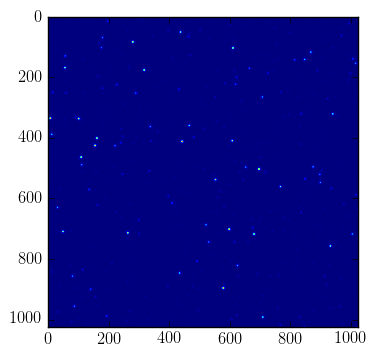

In [6]:
plt.imshow(s)

returning variable psf


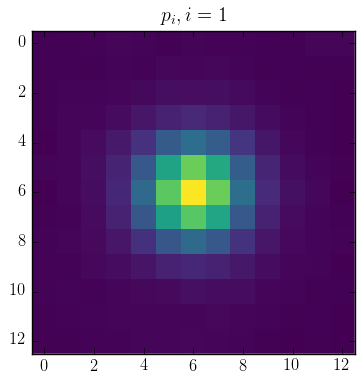

In [11]:
utils.plot_psfbasis(im.get_variable_psf()[1], nbook=True)

In [15]:
psf = im.get_variable_psf()[1][0]

returning variable psf


In [16]:
psf.shape

(13, 13)

In [24]:
psf_hat = np.fft.fft2(psf)

In [41]:
norm = psf_hat*psf_hat.conjugate()

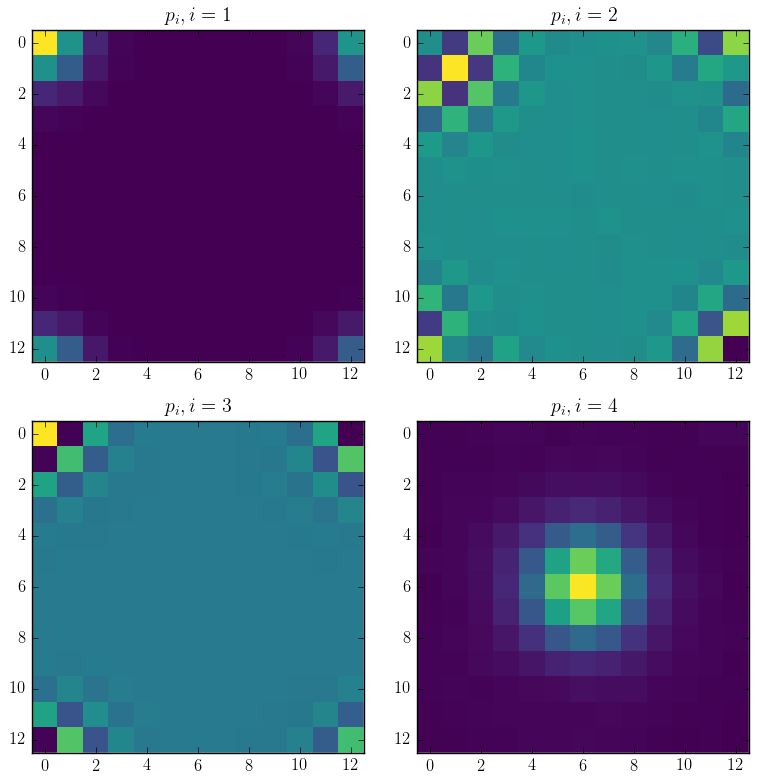

In [44]:
utils.plot_psfbasis([psf, psf_hat.real, psf_hat.imag, norm.real], nbook=True)